#Time-Series Visualize Intermediate Representations
ts_visualize_ir.ipynb

This notebook allows for data exploration using the intermediate representation formats (IR1 dataframes, IR2 and final numpy arrays) defined in the LLVM inspired architecure of the load_data_time_series work.

Author:  [Lee B. Hinkle](https://userweb.cs.txstate.edu/~lbh31/), [IMICS Lab](https://imics.wp.txstate.edu/), Texas State University, 2023

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

TODO:
* 



In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt # for plotting training curves
#imports for computing and displaying output metrics
from tabulate import tabulate # for verbose tables, showing data
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import urllib.request # to get files from web w/o !wget

In [2]:
def get_py_file(fname, url):
    """checks for local file, if none downloads from URL.    
    :return: nothing"""
    #fname = 'load_data_utils.py'
    #ffname = os.path.join(my_dir,fname)
    if (os.path.exists(fname)):
        print ("Local",fname, "found, skipping download")
    else:
        print("Downloading",fname, "from IMICS git repo")
        urllib.request.urlretrieve(url, filename=fname)

get_py_file(fname = 'load_data_utils.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/load_data_utils.py')
get_py_file(fname = 'load_data_transforms.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/load_data_transforms.py')
get_py_file(fname = 'twristar_load_dataset.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/HAR/TWristAR/twristar_load_dataset.py')
get_py_file(fname = 'gesture_phase_segmentation_load_dataset.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/Gesturing_Signing/gesture_phase_segmentation_load_dataset.py')

In [3]:
import load_data_transforms as xform
import load_data_utils as utils
import twristar_load_dataset as twristar
import gesture_phase_segmentation_load_dataset as gps

Local load_data_utils.py found, skipping download
Local load_data_transforms.py found, skipping download
Local load_data_utils.py found, skipping download
Local load_data_transforms.py found, skipping download


In [ ]:
# environment and execution parameters
my_dir = '.' # global for mounted drives, replace with absolute path if desired
dataset_dir = my_dir # TWristAR zip file contains TWristAR directory
working_dir = os.path.join(my_dir,'TWristAR_temp') # temp dir for processing

if not os.path.exists(working_dir):
    os.makedirs(working_dir)

interactive = True # for compatibity, this notebook is tested only as interactive
verbose = True # also mostly for compatibility

In [81]:
#@title Select Dataset
dataset = "Gesture Phase Segmentation" #@param ["TWristAR","TWristAR Free-Form","Gesture Phase Segmentation"]

In [82]:
if dataset == "TWristAR":
    ir1_dict = twristar.get_twristar_ir1_dict()
    label_dict = twristar.label_map_twristar['label']
if dataset == "TWristAR Free-Form":
    ir1_dict = twristar.get_twristar_ir1_dict(scripted=False)
    label_dict = twristar.label_map_twristar['label']
if dataset == "Gesture Phase Segmentation":
    ir1_dict = gps.get_gps_ir1_dict()
    label_dict = gps.label_map_gps['label']
key_list = list(ir1_dict) # ir1_dict.keys() returns a dict_keys type
my_key = 0 # sort of a global

Dataset:  Gesture Phase Segmentation


# Running the next cell will cycle through all of the IR1 dataframes in the dataset

Dataset:  Gesture Phase Segmentation Source file: a2_raw
Start Time 1970-01-01 01:25:03.698000
 End Time  1970-01-01 01:25:55.956000
{'Rest': 0, 'Preparation': 1, 'Stroke': 2, 'Hold': 3, 'Retraction': 4}
Rest           493
Stroke         431
Preparation    200
Retraction      86
Hold            54
Name: label, dtype: int64
None


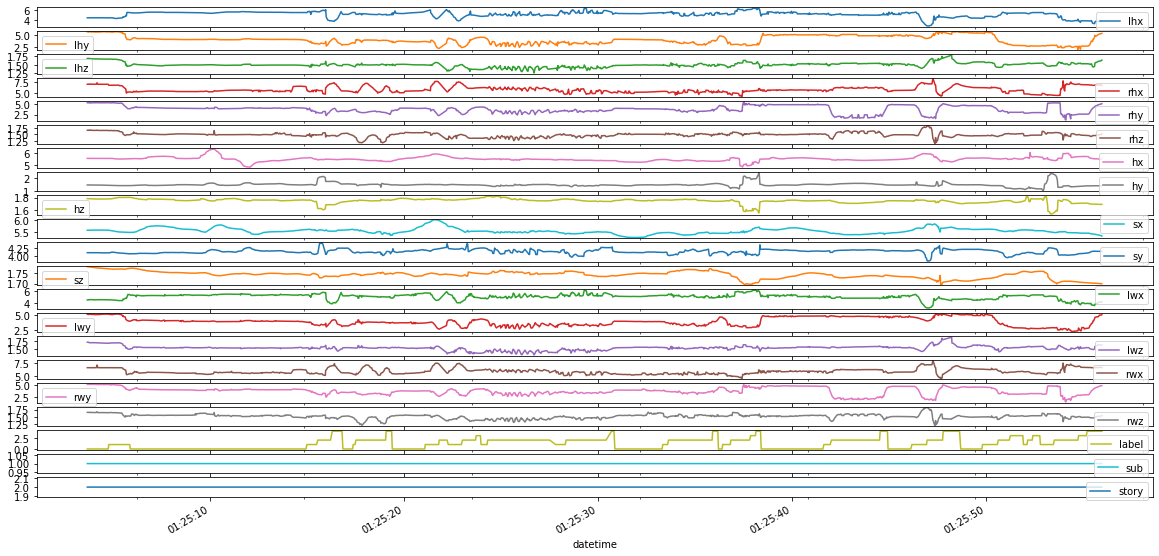

In [84]:
print("Dataset: ", dataset, "Source file:",key_list[my_key])
my_df = ir1_dict[key_list[my_key]]
print("Start Time", my_df.index[0])
print(" End Time ", my_df.index[-1])
print(label_dict)
print(print (my_df['label'].value_counts()))
# convert dataframe categorical strings to ints per label mapping dict (so they can be plotted and take less room)
my_df = xform.assign_ints_ir1_labels(my_df, label_mapping_dict = label_dict)
my_df.plot(subplots=True, figsize=(20, 10))
my_key = (my_key + 1) % len(key_list)

# should be able to control output further as pandas generates matplotlib obj
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html

# Get the full numpy arrays - this needs updates!
Be careful of inspecting the test arrays!   The last version of this notebook in the internal repo has lot more per subject code from when IR3 contained both train and test data.  This was changed because it could result in leakage for more complex datasets that need further processing such as rebalancing training class.

In [ ]:
all_channels = ['accel_x', 'accel_y', 'accel_z', 'accel_ttl', 'bvp', 'eda', 'p_temp']
# TODO:  above should be pulled from dataframe column names
keep_channels = ['accel_x', 'accel_y', 'accel_z', 'accel_ttl']
x_train, y_train, x_test, y_test \
                            = loader.twristar_load_dataset(
                                one_hot_encode = False,
                                keep_channel_list = keep_channels)
headers = ("Array","shape", "data type")
mydata = [("x_train:", x_train.shape, x_train.dtype),
        ("y_train:", y_train.shape, y_train.dtype),
        ("x_test:", x_test.shape, x_test.dtype),
        ("y_test:", y_test.shape, y_test.dtype)]
print("\n",tabulate(mydata, headers=headers))
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("\nInstances of each label")
# this should probably be a graph and TWristAR is different in that it uses
# strings for the labels (which take up more space and should be updated)
# when not one-hot encoded.
print("   Label #samples")
print(np.asarray((unique_elements, counts_elements)).T)
print ('\n','-'*72)


 Array     shape          data type
--------  -------------  -----------
x_train:  (2077, 96, 4)  float32
y_train:  (2077, 1)      <U10
x_test:   (1091, 96, 4)  float32
y_test:   (1091, 1)      <U10

Instances of each label
   Label #samples
[['Downstairs' '317']
 ['Jogging' '347']
 ['Sitting' '353']
 ['Standing' '342']
 ['Upstairs' '370']
 ['Walking' '348']]

 ------------------------------------------------------------------------


# Plots based on the numpy arrays

In [ ]:
#Find min and max values for consistent plot scales
min_g = np.nanmin(x_train[::1])
max_g = np.nanmax(x_train[::1])
print ('min g value is',min_g,'max g value is',max_g)

min g value is -2.0 max g value is 2.0159488


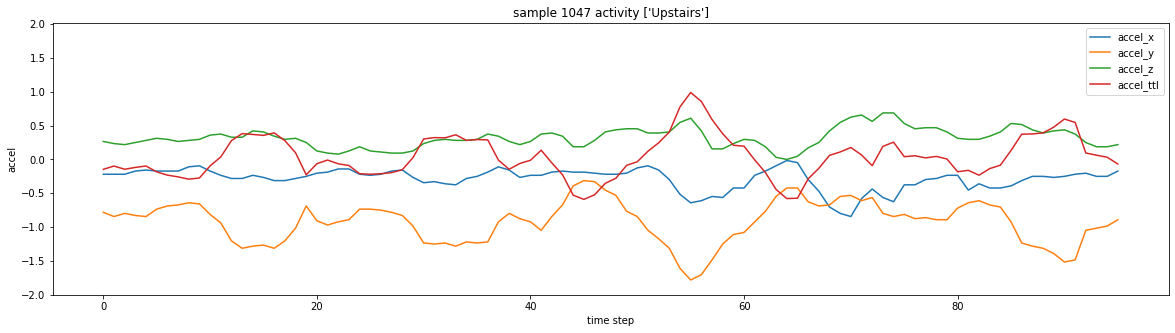

In [ ]:
#@title Select Activity (each cell execution will display a random sample)
Activity_Label = "Upstairs" #@param ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
act_label = Activity_Label
#Plot a random sample - each time cell is run a new one appears
# find index of rows were both sub and activity match
# see https://stackoverflow.com/questions/57496890/numpy-where-matching-two-specific-columns
all_index = np.where(np.all(y_train == act_label, axis=1))
sample_num = np.random.choice(all_index[0], size=1)[0]
plt.figure(figsize=(20,5))
plt.ylim([min_g, max_g])
plt.plot(x_train[sample_num])
plt.title('sample '+str(sample_num)+' activity '+str(y_train[sample_num]))
plt.xlabel("time step")
# Note legend is specific to a version of TWristAR - need to fully implement a
# dictionary with channel names to accomodate all datasets.
plt.ylabel("accel")
plt.legend(['accel_x', 'accel_y', 'accel_z', 'accel_ttl'])
plt.show()

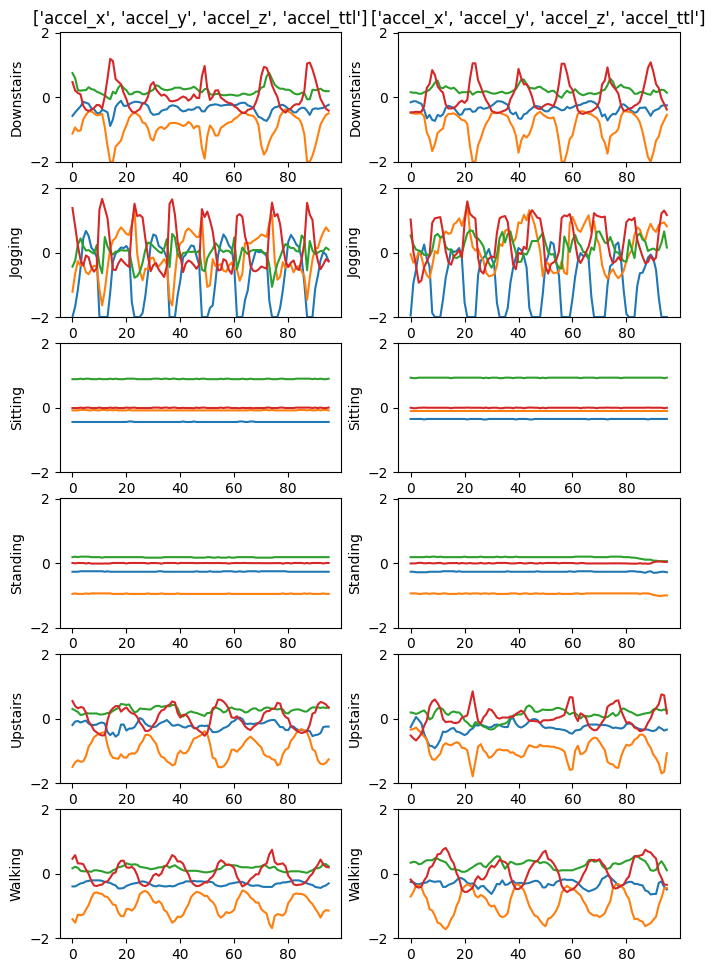

In [ ]:
# Plot two random samples - this time side by side for all activities
l_sub = 1
r_sub = 2
l_idx_list = [] # empty lists to add sample numbers for left and right graphs
r_idx_list = []
unique_labels = np.unique(y_train) # note this works because TWristAR has string lbls
for act_label in unique_labels:
    all_index = np.where(np.all(y_train == act_label, axis=1))
    l_index = np.random.choice(all_index[0], size=1)[0]
    l_idx_list.append(l_index)
    all_index = np.where(np.all(y_train == act_label, axis=1))
    r_index = np.random.choice(all_index[0], size=1)[0]
    r_idx_list.append(r_index)

#all_index = np.where(np.all(y_and_sub[:,0:2] == [act_label, my_sub], axis=1))
#sample_num = np.random.choice(all_index[0], size=1)[0]
# plot side by side - leveraged from final plot in ts_throwdown which is pngs.
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html?highlight=subplots
# spacing needs to be adjusted
# see https://matplotlib.org/stable/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py
# see https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html
if (len(l_idx_list) != len(r_idx_list)):
    print("Something went wrong - number of left & right indices aren't equal")
rows = len(l_idx_list)
cols = 2
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize = (8, 12), dpi = 100)
# might want to increase dpi if saving figure; it slows down display time
# I am not proud of the goofy list comprehension, trying to get graphs right!
for r in range(rows):
    for c in range(cols):
        if (r == 0):
            axs[r, c].set_title(keep_channels)
        #axs[r, c].set_axis_off()
        if (c == 0):
            axs[r, c].plot(x_train[l_idx_list[r]])
        else:
            axs[r, c].plot(x_train[r_idx_list[r]])
        axs[r,c].set_ylim(min_g, max_g)
        axs[r,c].set(ylabel=unique_labels[r])
        #axs[r,c].grid(True)